In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Lue data
df = pd.read_csv('/content/drive/MyDrive/ML_in_Med_Project/hcvdat0.csv')


# Tarkista ensimmäiset rivit
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
import numpy as np
import sklearn as sk
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
print(df.dtypes)
print(df.isnull().sum())

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [ ]:
# Shuffle dataset
print(df.head())
df = df.sample(frac = 1)
print(df.head())

   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  
     Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
9            10  0=Blood Donor   32   m  42.4  86.3  20.3  20.0  35.2   5.46   
526         527  0=Blood Donor   63   f  36.1  67.6  13.8  12.2   5.8   9.44   
475         476  0=Blood Donor   53   f  40.1  84.6  23.0  22.1   7.1   8.40   
389         390  0=Blood Donor   44  

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Unnamed: 0')  # Pudotetaan ID-sarake
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
# Generate a dataframe with only the numeric cols
numeric_df = df[numeric_cols].copy()
print(numeric_df.head())
print(numeric_df.shape)

     Age   ALB   ALP   ALT   AST   BIL    CHE  CHOL  CREA   GGT  PROT
9     32  42.4  86.3  20.3  20.0  35.2   5.46  4.45  81.0  15.9  69.9
526   63  36.1  67.6  13.8  12.2   5.8   9.44  6.88  66.0  22.4  65.0
475   53  40.1  84.6  23.0  22.1   7.1   8.40  5.16  70.0  82.6  74.6
389   44  45.6  57.6  21.0  19.1   3.7  10.36  6.68  74.0  20.8  74.4
485   54  39.9  61.2  23.3  24.5   4.5   9.22  5.47  69.0  58.2  65.8
(615, 11)


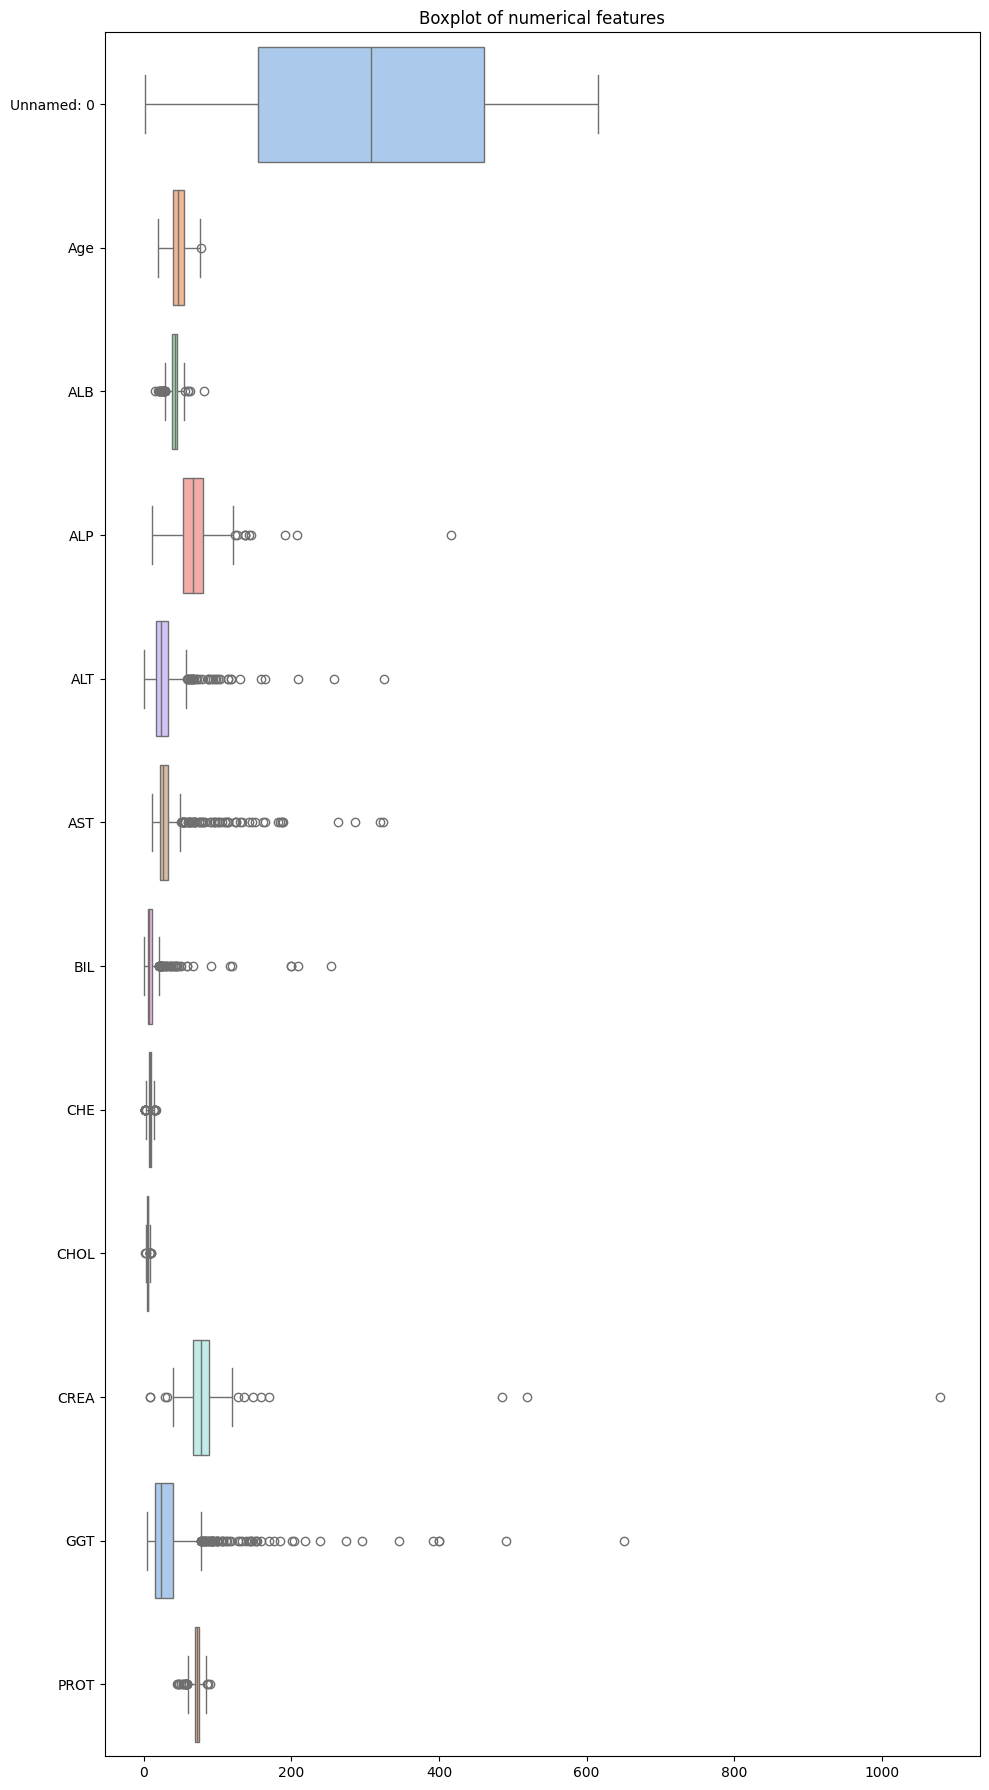

In [ ]:
# Piirrä boxplotit numeerisista sarakkeista
import matplotlib.pyplot as plt
import seaborn as sns
def piirra_boxplotit(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    if len(num_cols) == 0:
        print("DataFramessa ei ole numeerisia sarakkeita.")
        return

    plt.figure(figsize=(10, len(num_cols) * 1.5))
    sns.boxplot(data=df[num_cols], orient='h', palette="pastel")
    plt.title("Boxplot of numerical features")
    plt.tight_layout()
    plt.show()

# Kutsu boxplot-funktiota
piirra_boxplotit(df)

In [ ]:
df['ALP'] = np.clip(df['ALP'], 0, 250)

In [ ]:
df['CREA'] = np.clip(df['CREA'], 0, 200)

In [ ]:
df['ALT'] = np.clip(df['CREA'], 0, 150)

In [ ]:
df['AST'] = np.clip(df['CREA'], 0, 200)

In [ ]:
df['BIL'] = np.clip(df['CREA'], 0, 150)

In [ ]:
df['GGT'] = np.clip(df['CREA'], 0, 250)

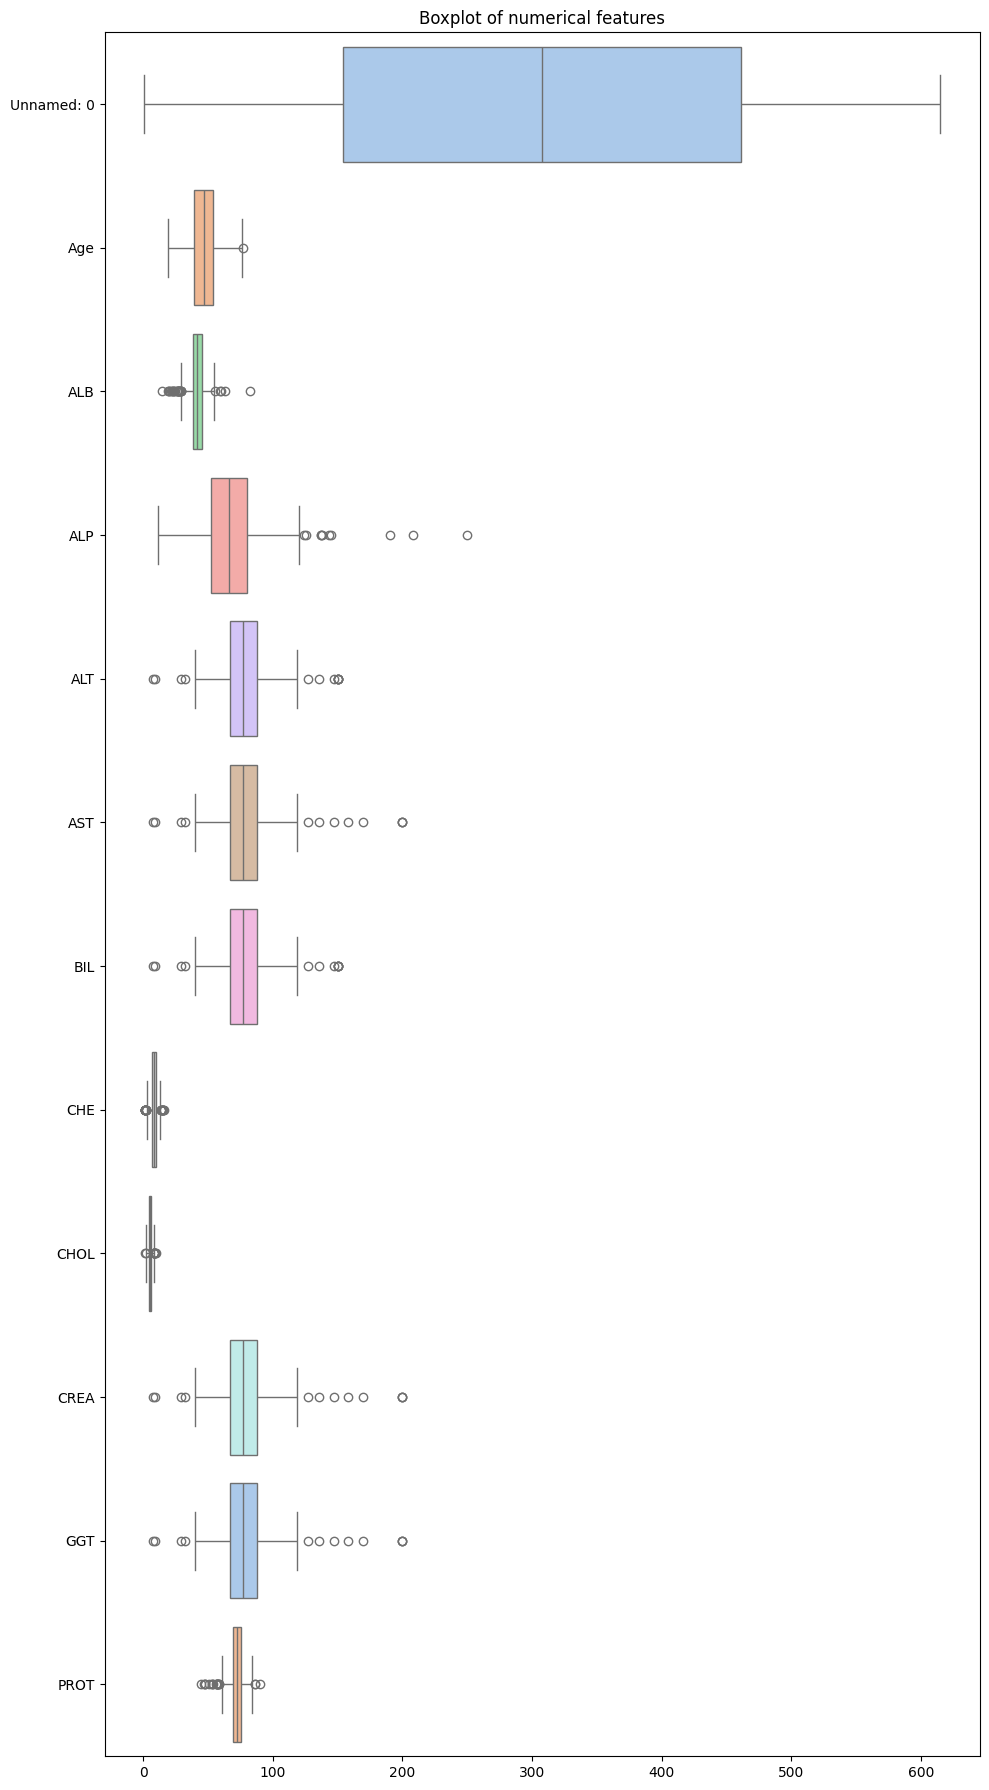

In [ ]:
# Kutsu boxplot-funktiota
piirra_boxplotit(df)

In [ ]:
# Print the df again to see how values have changed
print(numeric_df.head())
print(df.shape)

     Age   ALB   ALP   ALT   AST   BIL    CHE  CHOL  CREA   GGT  PROT
9     32  42.4  86.3  20.3  20.0  35.2   5.46  4.45  81.0  15.9  69.9
526   63  36.1  67.6  13.8  12.2   5.8   9.44  6.88  66.0  22.4  65.0
475   53  40.1  84.6  23.0  22.1   7.1   8.40  5.16  70.0  82.6  74.6
389   44  45.6  57.6  21.0  19.1   3.7  10.36  6.68  74.0  20.8  74.4
485   54  39.9  61.2  23.3  24.5   4.5   9.22  5.47  69.0  58.2  65.8
(615, 14)


In [ ]:
# Gather true labels for data and see if the train data is unbalanced

true_labels = []
for label in df['Category']:
  true_labels.append(int(label[0])) # append only the number of the label
class_counts = pd.Series(true_labels).value_counts().sort_index()
print("Number of samples in each class: ", class_counts)

Number of samples in each class:  0    540
1     24
2     21
3     30
Name: count, dtype: int64


In [ ]:
# As one can see, there is A LOT more samples in class 0.
# We should oversample the samples with classes 1-3 to help manage the skewness
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
data_resized, true_labels = ros.fit_resample(numeric_df, true_labels)

print(data_resized.shape)
print(data_resized.head())
class_counts = pd.Series(true_labels).value_counts().sort_index()
print("Number of resampled samples in each class: ", class_counts) # Now the classes have same number of samples

(2160, 11)
   Age   ALB   ALP   ALT   AST   BIL    CHE  CHOL  CREA   GGT  PROT
0   32  42.4  86.3  20.3  20.0  35.2   5.46  4.45  81.0  15.9  69.9
1   63  36.1  67.6  13.8  12.2   5.8   9.44  6.88  66.0  22.4  65.0
2   53  40.1  84.6  23.0  22.1   7.1   8.40  5.16  70.0  82.6  74.6
3   44  45.6  57.6  21.0  19.1   3.7  10.36  6.68  74.0  20.8  74.4
4   54  39.9  61.2  23.3  24.5   4.5   9.22  5.47  69.0  58.2  65.8
Number of resampled samples in each class:  0    540
1    540
2    540
3    540
Name: count, dtype: int64


In [ ]:
num_imputer = SimpleImputer(strategy='median')
data_resized = pd.DataFrame(num_imputer.fit_transform(data_resized), columns = data_resized.columns, index = data_resized.index)

In [ ]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='unknown')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [ ]:
scaler = StandardScaler()
data_resized = pd.DataFrame(scaler.fit_transform(data_resized), columns = data_resized.columns, index = data_resized.index)
data_resized.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.310409,0.370074,0.603303,-0.354478,-0.868529,0.283030,-0.684504,-0.293503,-0.083173,-0.674596,-0.537747
1,1.273822,-0.624744,0.173658,-0.500809,-0.995810,-0.444497,0.669790,1.781464,-0.231076,-0.610123,-1.303570
2,0.440199,0.006887,0.564244,-0.293694,-0.834261,-0.412327,0.315904,0.312763,-0.191635,-0.013006,0.196817
3,-0.310061,0.875379,-0.056099,-0.338719,-0.883215,-0.496463,0.982843,1.610685,-0.152194,-0.625993,0.165559
4,0.523561,-0.024695,0.026613,-0.286940,-0.795098,-0.476666,0.594930,0.577471,-0.201495,-0.255027,-1.178537


In [ ]:
print(data_resized.isnull().sum())

Age     0
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pca = PCA(n_components=len(numeric_cols))
pca_data = pca.fit_transform(data_resized)

In [ ]:
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.068987 -0.321168 -1.205224  0.108645 -0.893244  0.425526 -0.442730   
1  0.255605  1.077529 -1.492524 -1.600182  1.560874 -0.086365 -0.509027   
2  0.362850  0.748505 -0.329995 -0.385289  0.535946 -0.069882  0.270649   
3  1.938606  0.879802 -0.726385 -0.845961 -0.010821  0.191697 -0.010656   
4  0.373975  0.552329 -1.075421 -0.630655  0.860777 -0.349271 -0.629040   

        PC8       PC9      PC10      PC11  
0 -1.051607 -0.163942 -0.414041  0.657749  
1  0.654174 -0.180564  0.191758 -0.124330  
2 -0.607334 -0.156031  0.170927 -0.025458  
3  0.279800 -0.258774 -0.042309  0.223658  
4  0.073838  0.351928  0.014560 -0.108844  


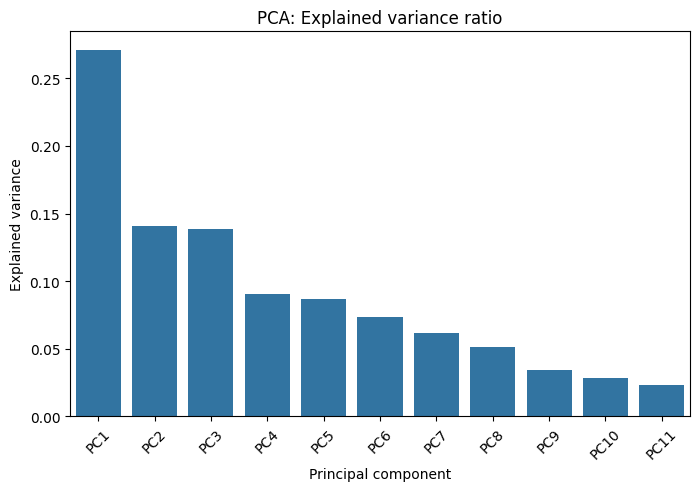

In [ ]:
explained_variance = pca.explained_variance_ratio_

components = pca.components_

feature_names = data_resized.columns
top_features = [feature_names[np.argmax(np.abs(comp))] for comp in components]

plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance)
plt.title('PCA: Explained variance ratio')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.xticks(rotation=45)
plt.show()

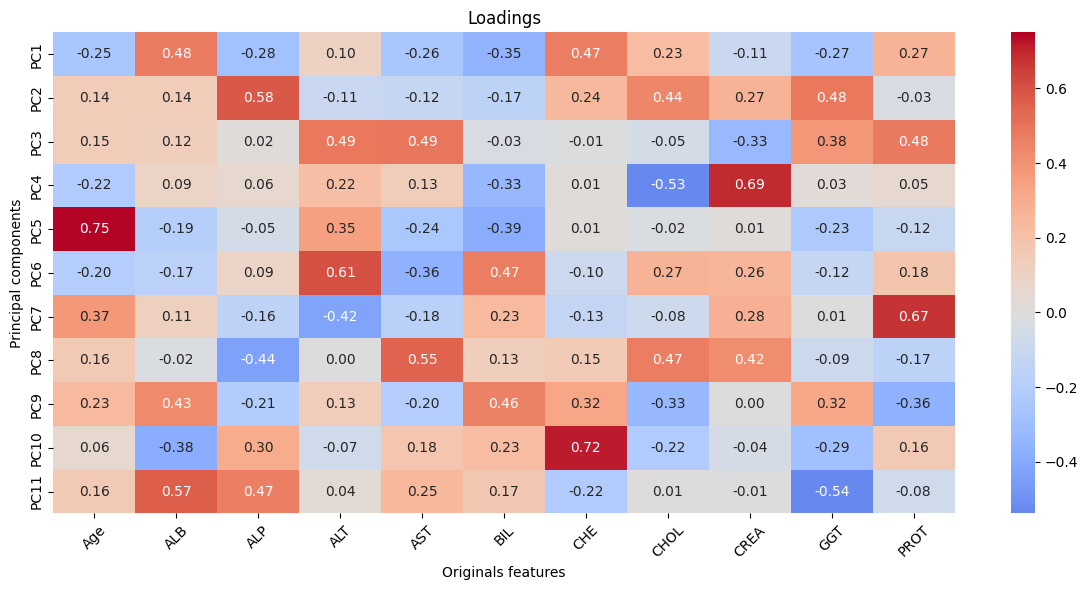

In [ ]:
loadings = pd.DataFrame(
    pca.components_,
    columns=numeric_cols,
    index=[f'PC{i+1}' for i in range(len(pca.components_))]) # Komponenttimatriisi: rivit = PC:t, sarakkeet = alkuperäiset muuttujat
plt.figure(figsize=(12, 6))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Loadings')
plt.xlabel('Originals features')
plt.ylabel('Principal components')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

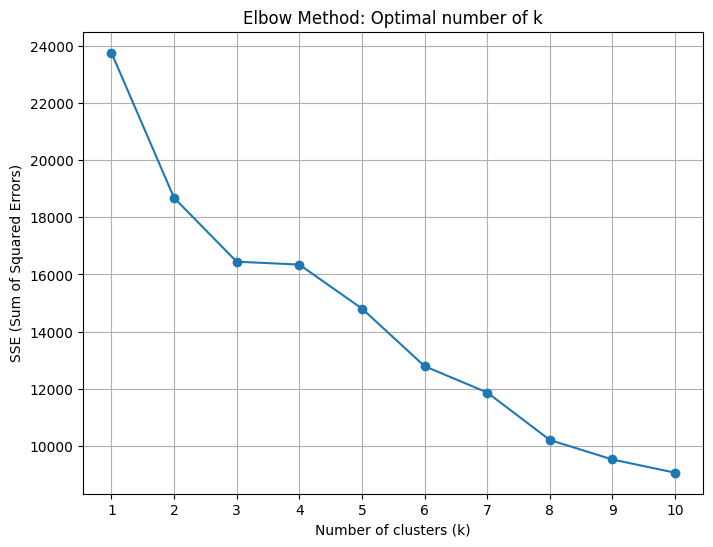

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_resized)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method: Optimal number of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

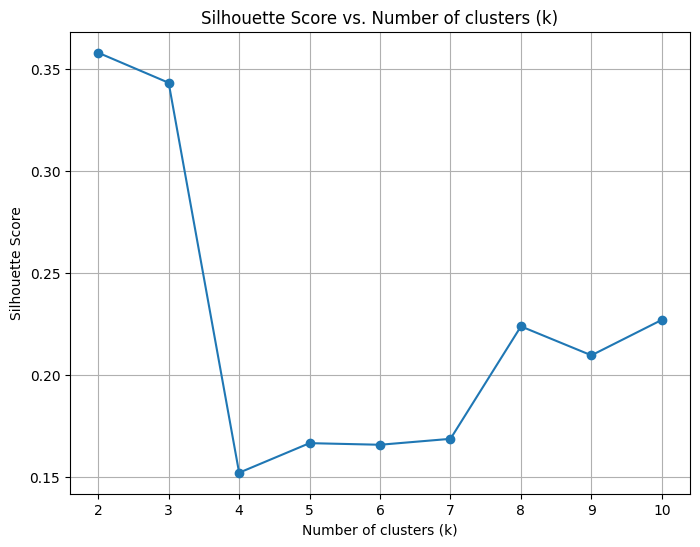

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
k_range = range(2, 11)  # Yleisesti käytetään k=2...k=10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_resized)
    score = silhouette_score(data_resized, kmeans.labels_)
    sil_scores.append(score)

# Piirrä Silhouette Score -käyrä
plt.figure(figsize=(8, 6))
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score vs. Number of clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

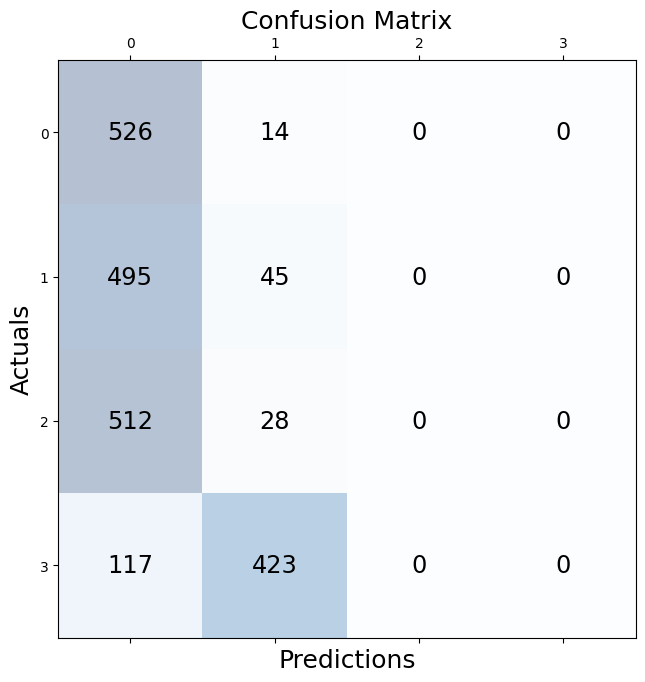

In [ ]:
# Lets try KMeans for three principal components
from sklearn.metrics import confusion_matrix

pca_2 = PCA(n_components=5)
train_pca = pca.fit_transform(data_resized)

# KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(train_pca)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

conf_matrix=confusion_matrix(true_labels, labels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

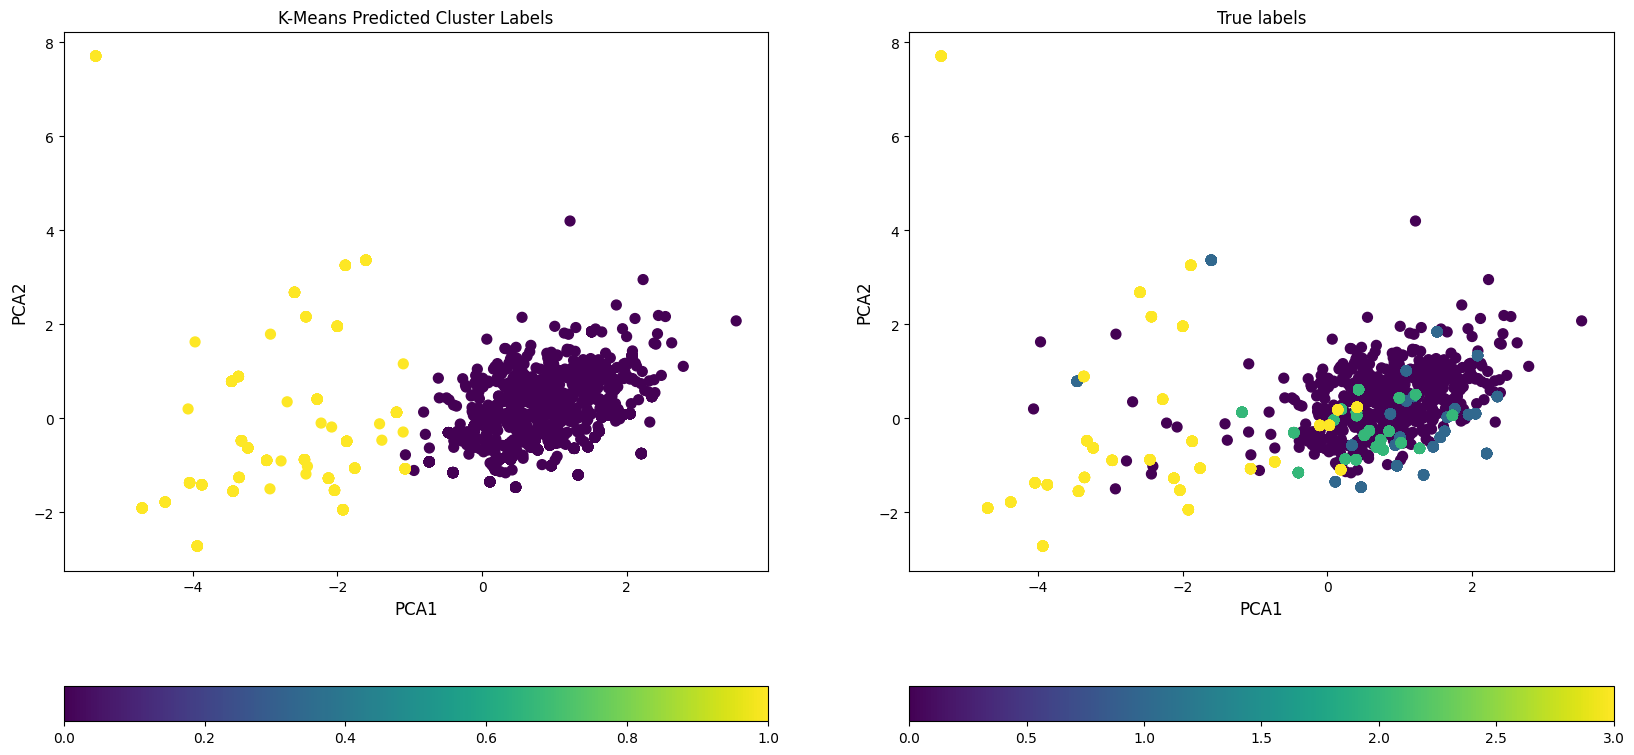

In [ ]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.scatter(train_pca[:,0], train_pca[:,1], c=clusters, cmap='viridis', s=50)
ax1.set_xlabel("PCA1", fontsize=12)
ax1.set_ylabel("PCA2", fontsize=12)
ax1.set_title("K-Means Predicted Cluster Labels", fontsize=12)
plt.colorbar(plot1, ax = ax1, orientation ='horizontal')

ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.scatter(train_pca[:,0], train_pca[:,1], c=true_labels, cmap='viridis', s=50)
ax2.set_xlabel("PCA1", fontsize=12)
ax2.set_ylabel("PCA2", fontsize=12)
ax2.set_title("True labels", fontsize=12)
plt.colorbar(plot2, ax = ax2, orientation = 'horizontal')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


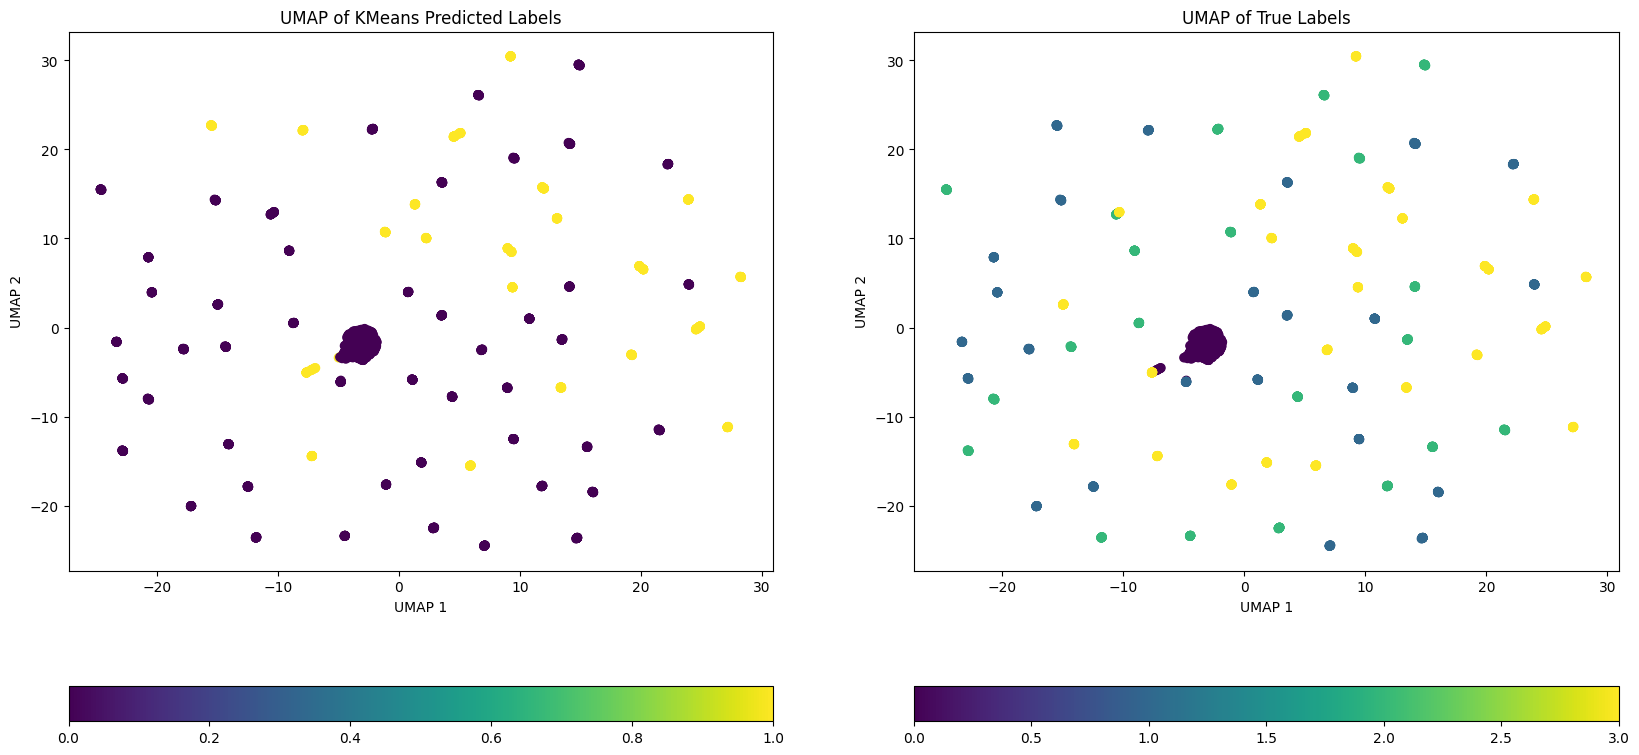

In [ ]:
# UMAP plot
import umap
reducer = umap.UMAP(n_components = 2, random_state = 42)
res_umap = reducer.fit_transform(train_pca)

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.scatter(res_umap[:,0], res_umap[:,1], c=clusters)
ax1.set_title("UMAP of KMeans Predicted Labels")
ax1.set_xlabel("UMAP 1")
ax1.set_ylabel("UMAP 2")
plt.colorbar(plot1, ax = ax1, orientation = 'horizontal')

ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.scatter(res_umap[:,0], res_umap[:,1], c=true_labels)
ax2.set_title("UMAP of True Labels")
ax2.set_xlabel("UMAP 1")
ax2.set_ylabel("UMAP 2")
plt.colorbar(plot2, ax = ax2, orientation = 'horizontal')

plt.show()

In [ ]:
# voidaan tarkastella klusteroinnin onnistumista
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
sil_score = silhouette_score(train_pca, clusters)
dbi = davies_bouldin_score(train_pca, clusters)
ch = calinski_harabasz_score(train_pca, clusters)

print(f"Davies-Bouldin Index: {dbi:.3f}")  #(pienempi on parempi)
print(f"Calinski-Harabasz Index: {ch:.3f}") #(suurempi on parempi)
print(f"Silhouette Score: {sil_score:.3f}")  #(-1 ja 1 välillä, lähellä 1 parempi)

Davies-Bouldin Index: 1.720
Calinski-Harabasz Index: 586.931
Silhouette Score: 0.358


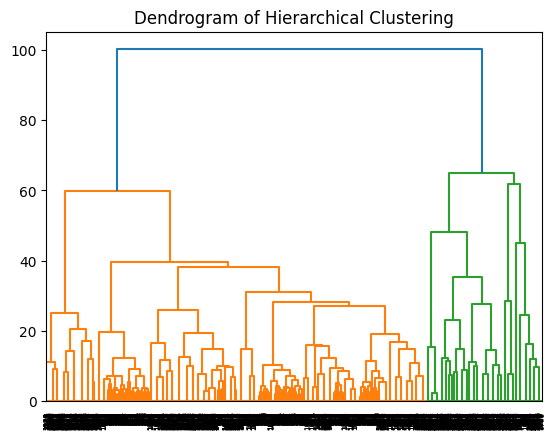

In [ ]:
# Let's try hierarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

hierarch = linkage(data_resized, method="ward")
fig = plt.figure()
dn = dendrogram(hierarch)
plt.title("Dendrogram of Hierarchical Clustering")
plt.show()

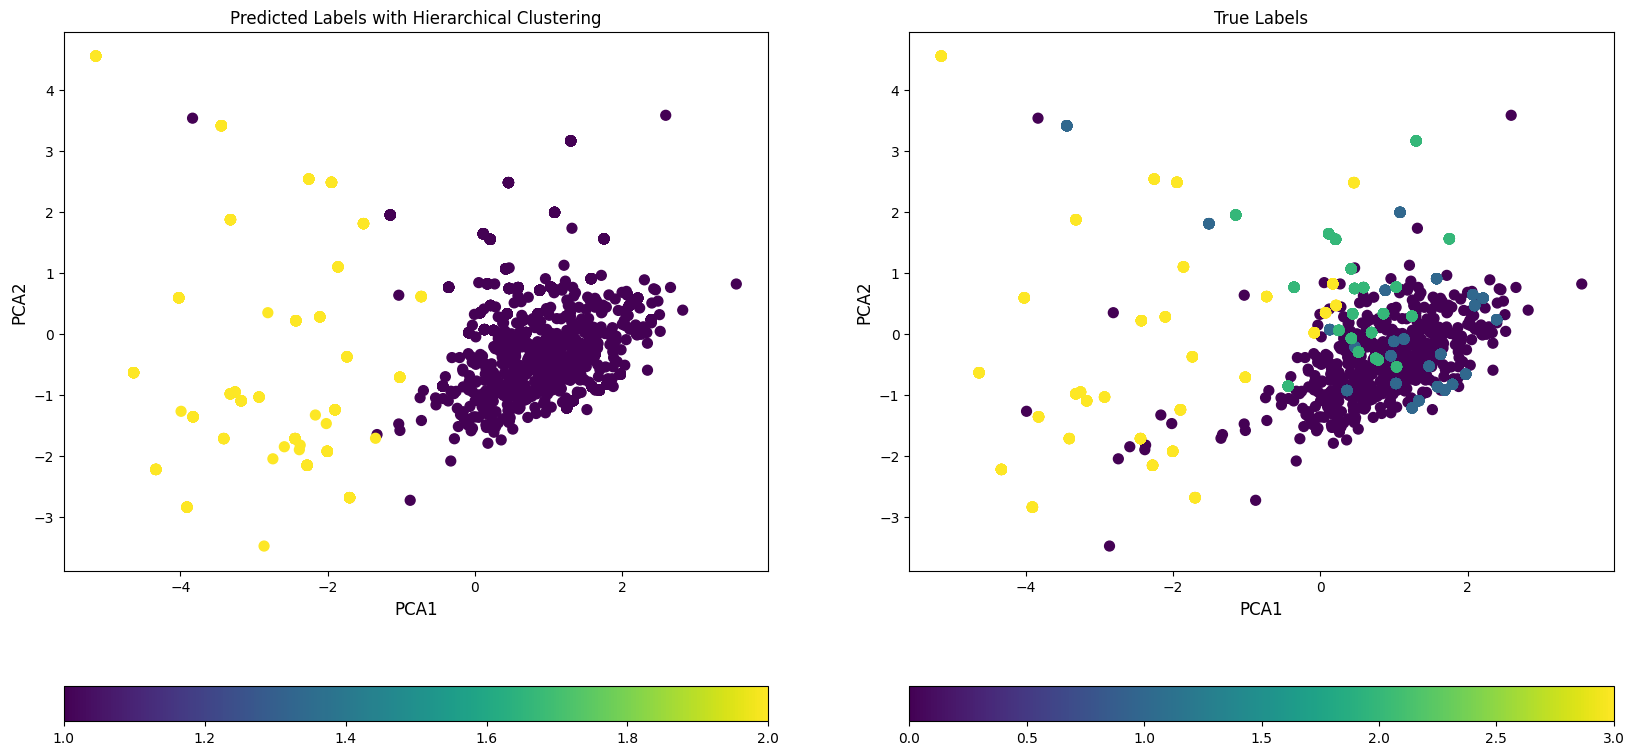

In [ ]:
labels_hierarch = fcluster(hierarch, t=2, criterion='maxclust')

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.scatter(train_pca[:,0], train_pca[:,1], c=labels_hierarch, cmap='viridis', s=50)
ax1.set_xlabel("PCA1", fontsize=12)
ax1.set_ylabel("PCA2", fontsize=12)
ax1.set_title("Predicted Labels with Hierarchical Clustering", fontsize=12)
plt.colorbar(plot1, ax = ax1, orientation ='horizontal')

ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.scatter(train_pca[:,0], train_pca[:,1], c=true_labels, cmap='viridis', s=50)
ax2.set_xlabel("PCA1", fontsize=12)
ax2.set_ylabel("PCA2", fontsize=12)
ax2.set_title("True Labels", fontsize=12)
plt.colorbar(plot2, ax = ax2, orientation = 'horizontal')

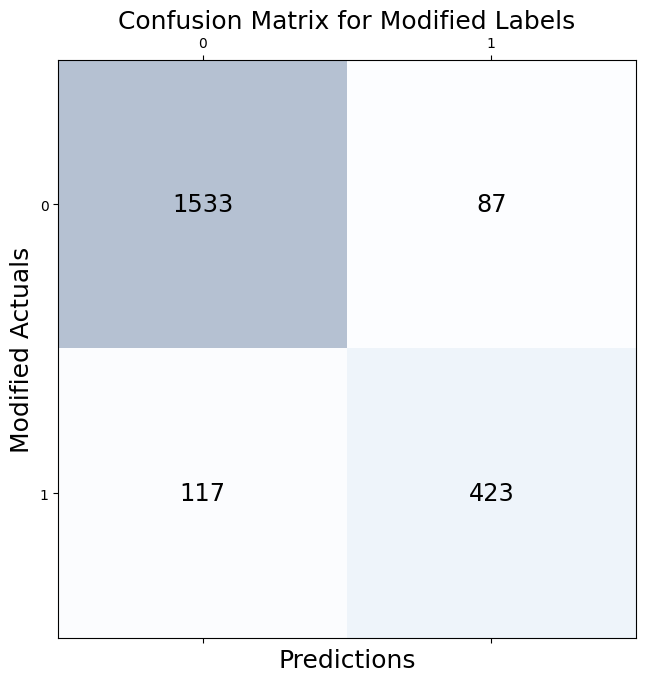

In [ ]:
# Confusion matrix with modified true labels
# Label 0: Category 0, Label 1: Categories 1-3

mod_true_labels = []

for label in true_labels:
  if label == 3:
    mod_true_labels.append(1)
  else:
    mod_true_labels.append(0)

conf_matrix_mod=confusion_matrix(mod_true_labels, labels)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix_mod, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_mod.shape[0]):
    for j in range(conf_matrix_mod.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_mod[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Modified Actuals', fontsize=18)
plt.title('Confusion Matrix for Modified Labels', fontsize=18)
plt.show()

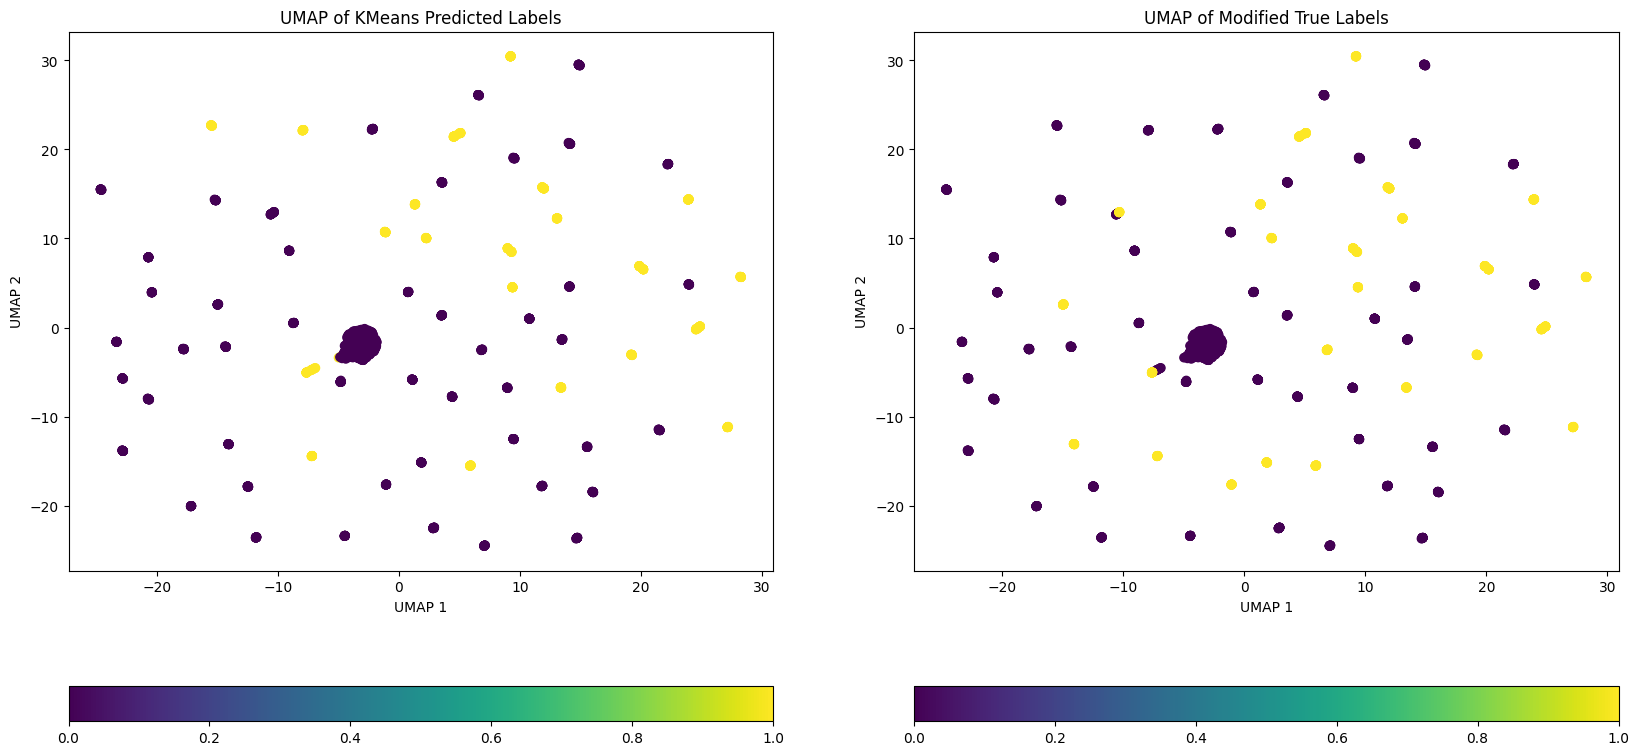

In [ ]:
# UMAP plot for combined true labels

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
plot1 = ax1.scatter(res_umap[:,0], res_umap[:,1], c=clusters)
ax1.set_title("UMAP of KMeans Predicted Labels")
ax1.set_xlabel("UMAP 1")
ax1.set_ylabel("UMAP 2")
plt.colorbar(plot1, ax = ax1, orientation = 'horizontal')

ax2 = fig.add_subplot(1,2,2)
plot2 = ax2.scatter(res_umap[:,0], res_umap[:,1], c=mod_true_labels)
ax2.set_title("UMAP of Modified True Labels")
ax2.set_xlabel("UMAP 1")
ax2.set_ylabel("UMAP 2")
plt.colorbar(plot2, ax = ax2, orientation = 'horizontal')

plt.show()